In [1]:
import keras
from keras import layers
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Size of the encoded representation (bidimensional)
dim_encoding = 2  

# Input (Dimension = 8) 
input = keras.Input(shape=(8,))
# Encoded => the encoded representation of the input (Dimension = 2)
encoded = layers.Dense(dim_encoding, activation='relu')(input)
# Decoded => Lossy reconstruction of the input Dimension = 8)
decoded = layers.Dense(8, activation='sigmoid')(encoded)

# Autoencoder (model) => maps an input to its reconstruction
autoencoder = keras.Model(input, decoded)

In [2]:
# Encoder (model) => maps an input to its encoded representation
encoder = keras.Model(input, encoded)

In [3]:
# This is our encoded (2-dimensional) input
encoded_input = keras.Input(shape=(dim_encoding,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# The decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [4]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [15]:
x_train = ([[0,0,0,2,0,0,0,0],[0,0,0,7,0,0,0,0],[0,0,0,0,0,1,0,0],[0,7,0,0,0,0,0,0],
            [0,6,0,0,0,0,0,0],[0,5,0,0,0,0,0,0],[0,0,0,0,0,0,3,0],[0,0,0,0,0,0,0,9],
            [0,0,0,4,0,0,0,0],[0,0,0,5,0,0,0,0],[0,0,0,0,0,0,8,0],[0,0,0,0,0,5,0,0],
            [0,6,0,0,0,0,0,0],[0,0,0,0,0,0,0,3],[0,0,0,0,0,0,0,7],[9,0,0,0,0,0,0,0],
            [0,0,0,0,0,3,0,0],[1,0,0,0,0,0,0,0],[0,0,0,6,0,0,0,0],[0,0,0,0,0,0,0,1],
            [0,0,0,1,0,0,3,0],[2,0,0,0,0,4,0,0],[0,0,0,6,0,0,3,0],[0,8,0,0,0,0,0,1],
            [0,0,0,9,0,3,0,0],[1,0,0,0,5,0,0,0],[0,0,5,6,0,0,0,0],[0,0,0,0,0,0,9,1],
            [0,0,0,0,4,3,0,0],[1,7,0,0,0,0,0,0],[0,0,5,6,0,0,0,0],[0,0,0,0,3,0,0,1],
            [0,0,5,5,0,3,0,0],[1,0,0,7,0,9,0,0],[0,8,0,6,0,9,0,0],[0,4,0,5,0,0,0,1],
            [1,0,0,1,0,0,3,0],[2,2,0,0,0,4,0,0],[0,6,0,6,0,0,3,0],[0,8,0,0,3,0,0,1],
            [8,0,0,9,0,3,0,0],[1,0,0,0,5,0,8,0],[0,0,5,6,0,5,0,0],[0,7,0,0,0,0,9,1],
            [1,0,0,0,4,3,0,0],[1,7,0,0,9,0,0,0],[0,0,5,6,0,7,0,0],[0,0,4,0,3,0,0,1]])
x_test = ([[0,0,0,0,0,0,0,0],[4,0,0,0,0,0,0,0],[0,0,0,4,0,0,0,0],[0,0,0,0,0,0,0,4]])
#x_train = tf.convert_to_tensor(x_train) 
#x_test = tf.convert_to_tensor(x_test)

In [16]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1/1 [==============================] - 0s 95ms/step - loss: 0.5858 - val_loss: 0.7299
Epoch 2/10
1/1 [==============================] - 0s 47ms/step - loss: 0.5796 - val_loss: 0.7295
Epoch 3/10
1/1 [==============================] - 0s 40ms/step - loss: 0.5734 - val_loss: 0.7290
Epoch 4/10
1/1 [==============================] - 0s 42ms/step - loss: 0.5672 - val_loss: 0.7286
Epoch 5/10
1/1 [==============================] - 0s 41ms/step - loss: 0.5611 - val_loss: 0.7281
Epoch 6/10
1/1 [==============================] - 0s 41ms/step - loss: 0.5549 - val_loss: 0.7277
Epoch 7/10
1/1 [==============================] - 0s 42ms/step - loss: 0.5488 - val_loss: 0.7272
Epoch 8/10
1/1 [==============================] - 0s 42ms/step - loss: 0.5427 - val_loss: 0.7268
Epoch 9/10
1/1 [==============================] - 0s 45ms/step - loss: 0.5366 - val_loss: 0.7263
Epoch 10/10
1/1 [==============================] - 0s 35ms/step - loss: 0.5305 - val_loss: 0.7259


In [17]:
encoded_data = encoder.predict(x_test)
decoded_data = decoder.predict(encoded_data)

In [18]:
encoded_data

array([[0.        , 0.02998894],
       [0.        , 0.        ],
       [1.5782456 , 0.        ],
       [0.31145278, 1.404948  ]], dtype=float32)

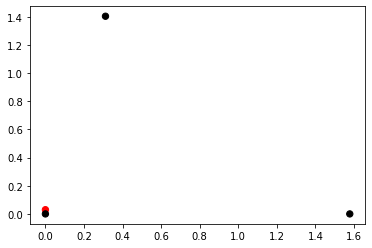

In [20]:
inputs = pd.DataFrame({
'x' : [0, 0, 1.5782456, 0.31145278],
'y' : [0.02998894, 0, 0, 1.404948],
'Cor' : [0, 1, 1, 1]})

# Seta um arranjo de cores
colormap = np.array(['r', 'k'])
 
# Plotar os dados em seus respectivos eixos
# Configura o arranjo de cores
plt.scatter(inputs.x, inputs.y, c=colormap[inputs.Cor], s=40)